# Time Series Data in Python

### Vanilla python

In [1]:
from datetime import datetime

In [2]:
datetime(year=2021, day=13, month=9)

datetime.datetime(2021, 9, 13, 0, 0)

In [4]:
from dateutil import parser

In [5]:
date = parser.parse("24th of April, 1993")
date

datetime.datetime(1993, 4, 24, 0, 0)

In [6]:
date.strftime("%A")

'Saturday'

### Numpy

In [7]:
import numpy as np

In [9]:
date = np.array("1994-06-16", dtype=np.datetime64)
date

array('1994-06-16', dtype='datetime64[D]')

In [11]:
date + np.arange(12)

array(['1994-06-16', '1994-06-17', '1994-06-18', '1994-06-19',
       '1994-06-20', '1994-06-21', '1994-06-22', '1994-06-23',
       '1994-06-24', '1994-06-25', '1994-06-26', '1994-06-27'],
      dtype='datetime64[D]')

In [13]:
# day based units
np.datetime64("2021-09-13")

numpy.datetime64('2021-09-13')

In [15]:
#  minute based units
np.datetime64("2021-09-13 18:16")

numpy.datetime64('2021-09-13T18:16')

> Timezone is automatically set based on the computer settings

In [17]:
# force certain types of units - add a unit argument
np.datetime64("2021-09-13", "ns")  # nanosecond units

numpy.datetime64('2021-09-13T00:00:00.000000000')

### Pandas
The convenience of the python datetime module combined with the efficiency of the numpy datetime64 datatype

In [18]:
import pandas as pd

In [19]:
date = pd.to_datetime("1st of July 2021")
date

Timestamp('2021-07-01 00:00:00')

In [20]:
date.strftime("%A")

'Thursday'

In [24]:
date + pd.to_timedelta(np.arange(12), "D")

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12'],
              dtype='datetime64[ns]', freq=None)

### indexing a series with timestamps

In [25]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [26]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [27]:
data["2015"]

2015-07-04    2
2015-08-04    3
dtype: int64

In [29]:
# pd.to_datetime is good at parsing a variety of formats
# passing a list of dates results in a datetime index object
dates = pd.to_datetime([datetime(2015, 7, 3), "4th of july 2015", '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [30]:
# converting to period index
dates.to_period("D")  # specify the period is days

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [32]:
dates[0]

Timestamp('2015-07-03 00:00:00')

In [31]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

```python
pd.date_range()
pd.period_range()
pd.timedelta_range()
```

In [33]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [34]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [35]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [36]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [37]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

> Look up Pandas frequency codes to find all the codes you can use

In [39]:
# 2 and a half hour frequency
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

```python
pandas.tseries.offsets
```

### Since pandas was designed with finance in mind, it can import direcly from many financial websites

In [41]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [42]:
goog.shape

(2863, 6)

In [43]:
goog = goog["Close"]

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.rcParams["figure.figsize"] = (10,6)

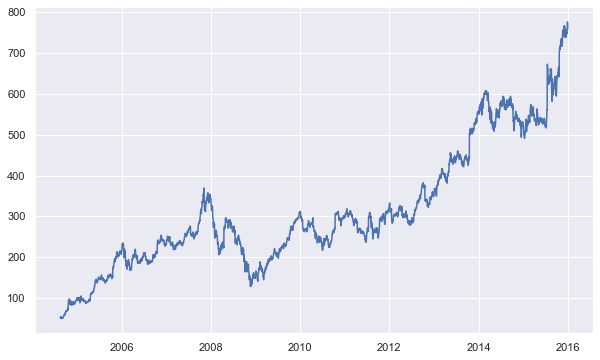

In [58]:
plt.figure(figsize=(10,6))
plt.plot(goog.index, goog.values)

plt.show()

### Resampling

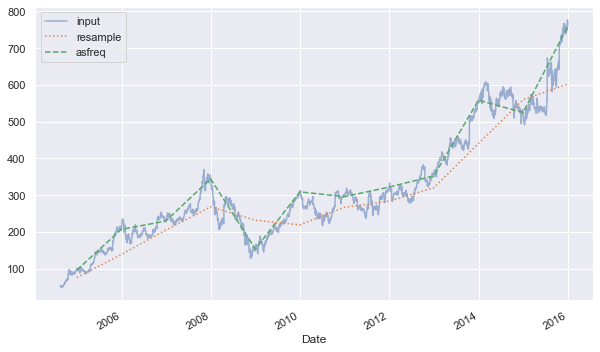

In [59]:
plt.figure(figsize=(10,6))
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

> asfreq() selects samples.  
> resample aggregates all samples in the range

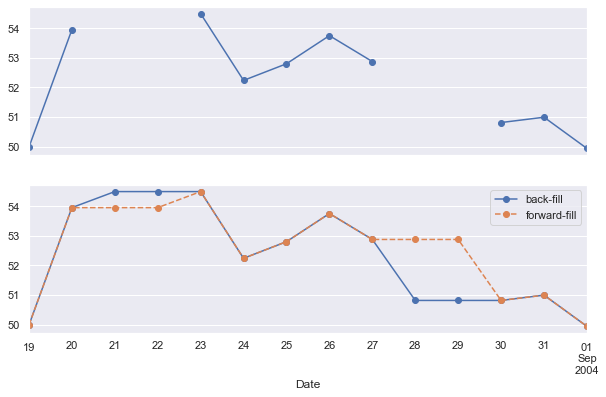

In [61]:
# interpolating non-business day values

fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

### Time shift

<ipython-input-62-b3e294b62dad>:8: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


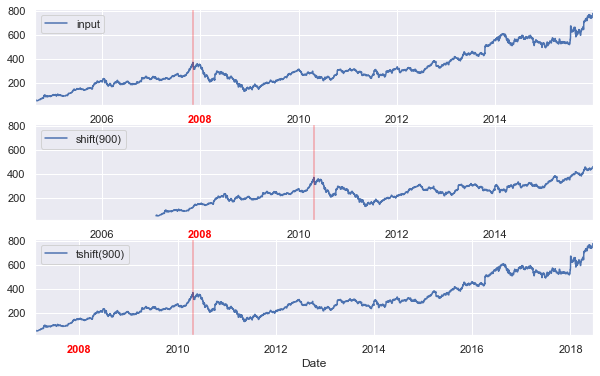

In [62]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

<ipython-input-63-500c6c126989>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365) / goog - 1)


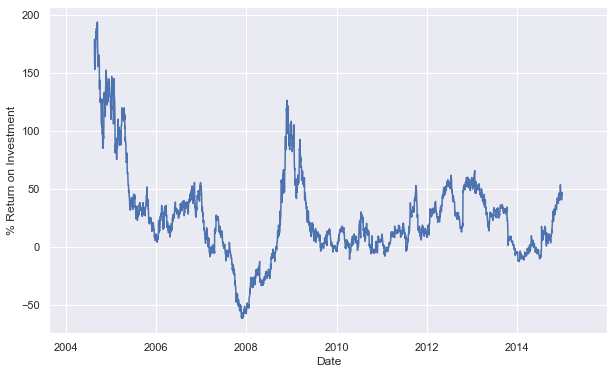

In [63]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

### Rolling Window

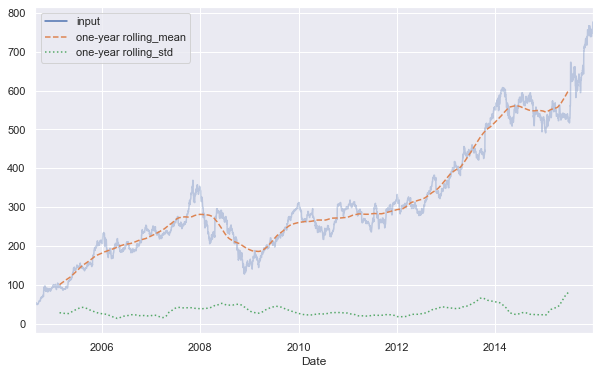

In [64]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)